## **HOMEWORK 3: SUPERVISED LEARNING**

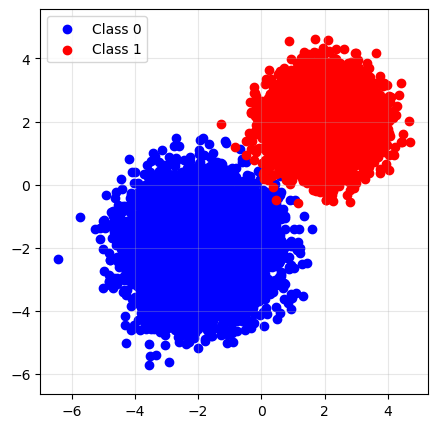

Theta finale: [-0.28889288  1.90960158  1.93852746]


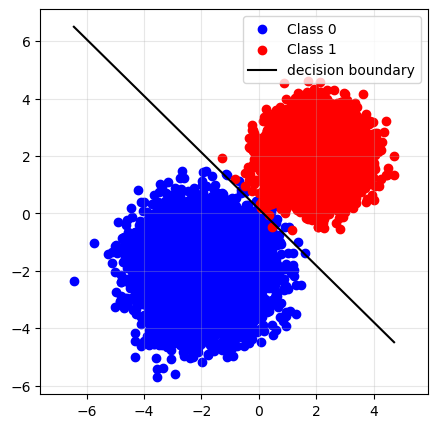

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# EXERCISE 1: Logistic Regression on a Toy 2D Dataset

np.random.seed(0) 
N = 10000

X0 = np.random.normal(loc=[-2,-2],scale=np.sqrt(1.0),size=(N,2))
y0 = np.zeros((N,1))

X1 = np.random.normal(loc=[2,2],scale=np.sqrt(0.5),size=(N,2))
y1 = np.ones((N,1))

X = np.vstack([X0, X1])
y = np.vstack([y0, y1])
X = np.hstack([np.ones((X.shape[0], 1)), X]) 

plt.figure(figsize=(5,5))
plt.scatter(X0[:,0], X0[:,1], c="blue", label="Class 0")
plt.scatter(X1[:,0], X1[:,1], c="red",  label="Class 1")
plt.legend()
plt.axis("equal")
plt.grid(alpha=0.3)
plt.show()

def sigmoid(z):
    return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))

def l(theta, X, y):
    p = sigmoid(X @ theta)
    p = np.clip(p, 1e-12, 1-(1e-12)) 
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def grad_l(theta, X, y):
    p = sigmoid(X @ theta)
    return (X.T @ (p - y)) / len(y)

def GD(l, grad_l, Theta0, X, Y, lr=0.1, epochs=30):
    thetas = [Theta0.copy()]
    theta = Theta0.copy()
    losses = [l(theta, X, Y)]
    for k in range(epochs):
        theta = theta - lr * grad_l(theta, X, Y)
        thetas.append(theta.copy())
        losses.append(l(theta,X,Y))
    return np.array(thetas), np.array(losses)

Theta0 = np.zeros((X.shape[1], 1))     
thetas, losses = GD(l, grad_l, Theta0, X, y, lr=0.1, epochs=1000)

Theta_hat = thetas[-1]              
print("Theta finale:", Theta_hat.ravel())

theta0, theta1, theta2 = Theta_hat.ravel()

x1_vals = np.linspace(min(X0[:,0].min(), X1[:,0].min()), 
                      max(X0[:,0].max(), X1[:,0].max()), 100) 
x2_vals = -(theta0 + theta1 * x1_vals) / theta2

plt.figure(figsize=(5,5))
plt.scatter(X0[:,0], X0[:,1], c="blue", label="Class 0")
plt.scatter(X1[:,0], X1[:,1], c="red",  label="Class 1")
plt.plot(x1_vals, x2_vals, "k-", label="decision boundary")
plt.legend()
plt.axis("equal")
plt.grid(alpha=0.3)
plt.show()


SGD accuracy (N_batch = 1): 99.94%
SGD accuracy (N_batch = 10): 99.94%
SGD accuracy (N_batch = 10000): 99.89%


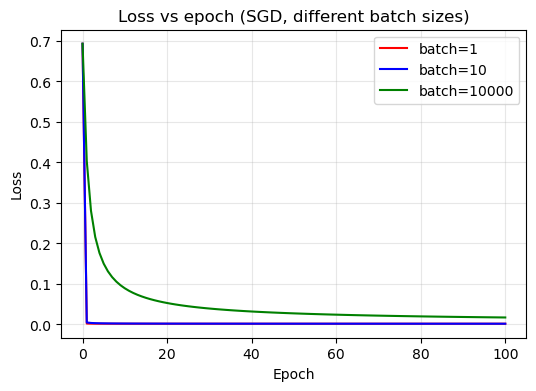

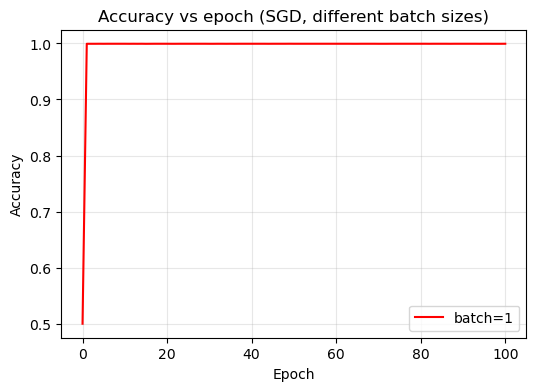

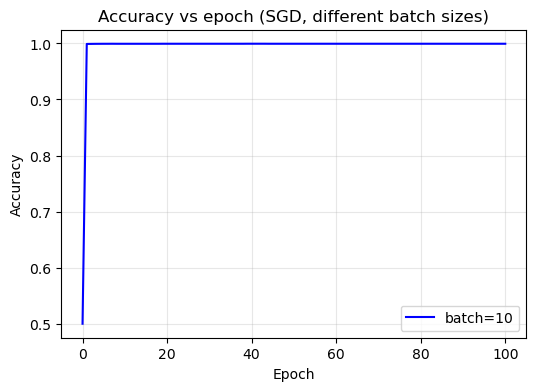

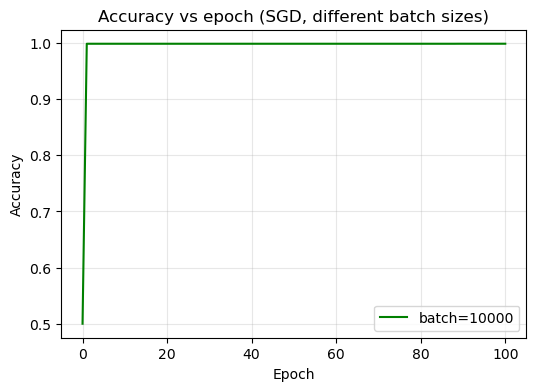

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# EXERCISE 2: SGD on Logistic Regression

np.random.seed(0) 
N = 10000

X0 = np.random.normal(loc=[-2,-2],scale=np.sqrt(1.0),size=(N,2))
y0 = np.zeros((N,1))

X1 = np.random.normal(loc=[2,2],scale=np.sqrt(0.5),size=(N,2))
y1 = np.ones((N,1))

X = np.vstack([X0, X1])
y = np.vstack([y0, y1])
X = np.hstack([np.ones((X.shape[0], 1)), X]) 

def sigmoid(z):
    return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))

def l(theta, X, y):
    p = sigmoid(X @ theta)
    p = np.clip(p, 1e-12, 1-(1e-12)) 
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def grad_l(theta, X, y):
    p = sigmoid(X @ theta)
    return (X.T @ (p - y)) / len(y)

def accuracy(theta, X, y):
    preds = sigmoid(X @ theta) >= 0.5
    return np.mean(preds == y)

def SGD(l, grad_l, Theta0, X, Y, batch_size=32, lr=0.1, epochs=100):
    losses = [l(Theta0, X, Y)]
    accs = [accuracy(Theta0, X, Y)]
    Theta = Theta0.copy()
    thetas = [Theta.copy()]
    N = X.shape[0]
    
    for epoch in range(epochs):
        indices = np.random.permutation(N)  
        for start in range(0, N, batch_size):
            batch_idx = indices[start : start+batch_size]
            Xb = X[batch_idx]
            Yb = Y[batch_idx]

            g = grad_l(Theta, Xb, Yb)

            Theta = Theta - lr * g

        losses.append(l(Theta, X, Y))
        thetas.append(Theta.copy())
        accs.append(accuracy(Theta, X, Y))
    return np.array(thetas), np.array(losses), np.array(accs)

N_batch = [1, 10, N]
results = {}

Theta0 = np.zeros((X.shape[1], 1))

for b in N_batch:
    thetas, losses, accs = SGD(l, grad_l, Theta0, X, y,
                               batch_size=b)
    results[b] = {"losses": losses, "accs": accs}
    print(f"SGD accuracy (N_batch = {b}): {accs[-1]*100:.2f}%")



colors = ["red", "blue", "green"]
idx_color = 0
plt.figure(figsize=(6,4))
for b in N_batch:
    plt.plot(results[b]["losses"], label=f"batch={b}", color=colors[idx_color])
    idx_color +=1
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs epoch (SGD, different batch sizes)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


idx_color = 0
for b in N_batch:
    plt.figure(figsize=(6,4))
    plt.plot(results[b]["accs"], label=f"batch={b}", color=colors[idx_color])
    idx_color +=1
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs epoch (SGD, different batch sizes)")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# EXERCISE 3: Evaluation Metrics on a Synthetic Dataset

print(f"Theta_hat: {Theta_hat.ravel()}")

y_prob = sigmoid(X @ Theta_hat)

def eval_metrics(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    accuracy  = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) \
                if (precision + recall) > 0 else 0.0
    return TP, FP, FN, TN, accuracy, precision, recall, f1

for threshold in [0.5, 0.3, 0.7]:
    TP, FP, FN, TN, acc, prec, rec, f1 = eval_metrics(y, y_prob, threshold)
    print(f"Threshold = {threshold}")
    print("TP, FP, FN, TN:", TP, FP, FN, TN)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print()


Theta_hat: [-0.28889288  1.90960158  1.93852746]
Threshold = 0.5
TP, FP, FN, TN: 9999 19 1 9981
Accuracy: 0.999
Precision: 0.9981034138550609
Recall: 0.9999
F1-score: 0.9990008991907283

Threshold = 0.3
TP, FP, FN, TN: 10000 40 0 9960
Accuracy: 0.998
Precision: 0.9960159362549801
Recall: 1.0
F1-score: 0.998003992015968

Threshold = 0.7
TP, FP, FN, TN: 9990 3 10 9997
Accuracy: 0.99935
Precision: 0.999699789852897
Recall: 0.999
F1-score: 0.9993497724203471



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
SGD accuracy: 76.43%


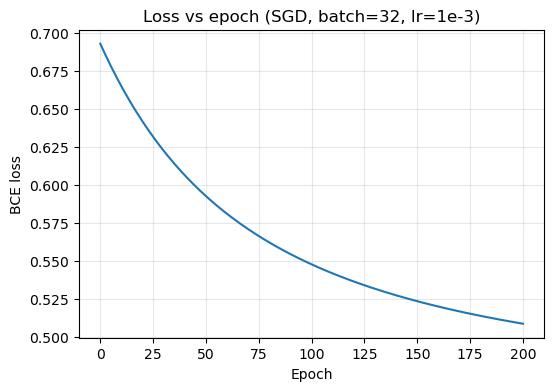

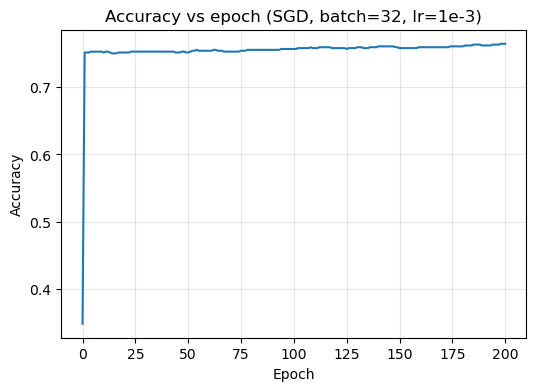

Adam accuracy: 78.26%


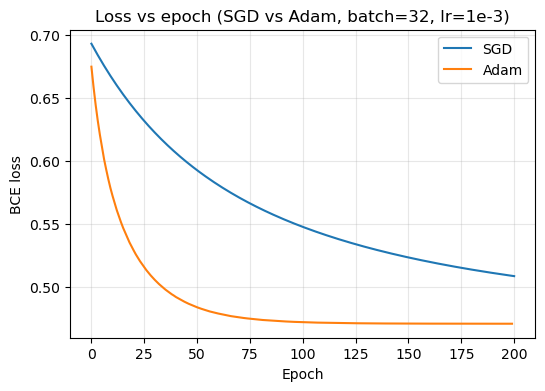

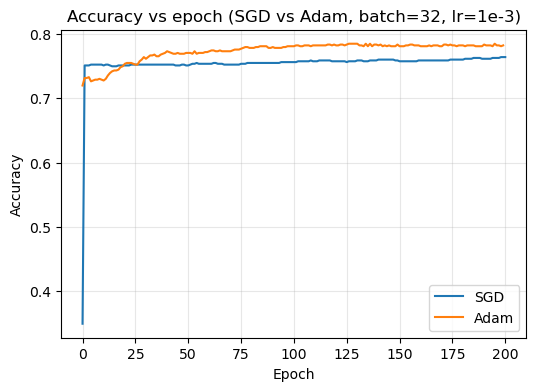

METRICS (SGD)
Confusion matrix (TP, FP, FN, TN): 159 72 109 428
Accuracy:  0.764
Precision: 0.688
Recall:    0.593
F1-score:  0.637

METRICS (ADAM)
Confusion matrix (TP, FP, FN, TN): 156 55 112 445
Accuracy:  0.783
Precision: 0.739
Recall:    0.582
F1-score:  0.651


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# EXERCISE 4: Logistic Regression on a Real Dataset

url = "diabetes.csv"
df = pd.read_csv(url)

X = df.drop("Outcome", axis=1).values 
Y = df["Outcome"].values.reshape(-1,1) 

print(df.head())

X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

X = np.hstack([np.ones((X.shape[0], 1)), X])
N, d = X.shape

def sigmoid(z):
    return 1/(1+np.exp(-z))

def l(theta, X, y):
    p = sigmoid(X @ theta)
    return -(y*np.log(p) + (1-y)*np.log(1-p)).mean()

def grad_l(theta, X, y):
    return (X.T @ (sigmoid(X @ theta) - y)) / len(y)

def accuracy(theta, X, y):
    preds = sigmoid(X @ theta) >= 0.5
    return (preds == y).mean()

def SGD(l, grad_l, Theta0, X, y, batch_size=32, lr=1e-3, epochs=200):
    N = X.shape[0]
    theta = Theta0.copy()

    losses = [l(theta, X, y)]
    accs   = [accuracy(theta, X, y)]
    thetas = [theta.copy()]

    for epoch in range(epochs):
        indices = np.random.permutation(N)

        for start in range(0, N, batch_size):
            batch_idx = indices[start:start+batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]

            g = grad_l(theta, Xb, yb)
            theta = theta - lr * g

        losses.append(l(theta, X, y))     
        accs.append(accuracy(theta, X, y)) 
        thetas.append(theta.copy())

    return np.array(thetas), np.array(losses), np.array(accs)

Theta0 = np.zeros((d, 1))
thetas, losses, accs = SGD(l, grad_l, Theta0, X, Y, batch_size=32, lr=1e-3, epochs=200)
Theta_hat = thetas[-1]

print(f"SGD accuracy: {accs[-1]*100:.2f}%")

plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("BCE loss")
plt.title("Loss vs epoch (SGD, batch=32, lr=1e-3)")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(accs)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epoch (SGD, batch=32, lr=1e-3)")
plt.grid(alpha=0.3)
plt.show()

def train_adam(l, grad_l, X, y, lr=1e-3, epochs=200, batch_size=32, beta1=0.9, beta2=0.999, eps=1e-8):
    N, d = X.shape
    theta = np.zeros((d, 1))
    m = np.zeros_like(theta)
    v = np.zeros_like(theta)
    t = 0

    losses, accs = [], []

    for epoch in range(epochs):
        indices = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = indices[start:start+batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]
            g = grad_l(theta, Xb, yb)

            t += 1
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * (g * g)
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)

            theta -= lr * (m_hat / (np.sqrt(v_hat) + eps))

        losses.append(l(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, np.array(losses), np.array(accs)

theta_adam, loss_adam, acc_adam = train_adam(l, grad_l, X, Y, lr=1e-3, epochs=200, batch_size=32)
print(f"Adam accuracy: {acc_adam[-1]*100:.2f}%")

epochs = np.arange(len(losses))

plt.figure(figsize=(6,4))
plt.plot(losses,    label="SGD")
plt.plot(loss_adam, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("BCE loss")
plt.title("Loss vs epoch (SGD vs Adam, batch=32, lr=1e-3)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(accs,      label="SGD")
plt.plot(acc_adam,  label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epoch (SGD vs Adam, batch=32, lr=1e-3)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

def eval_metrics(theta, X, y, threshold=0.5):
    p = sigmoid(X @ theta)
    y_pred = (p >= threshold).astype(int)
    y_true = y.astype(int)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    accuracy  = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall    = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1        = 2 * precision * recall / (precision + recall) \
                if (precision + recall) > 0 else 0.0

    return TP, FP, FN, TN, accuracy, precision, recall, f1

print("METRICS (SGD)")
TP, FP, FN, TN, acc_sgd, prec_sgd, rec_sgd, f1_sgd = eval_metrics(Theta_hat, X, Y)
print("Confusion matrix (TP, FP, FN, TN):", TP, FP, FN, TN)
print(f"Accuracy:  {acc_sgd:.3f}")
print(f"Precision: {prec_sgd:.3f}")
print(f"Recall:    {rec_sgd:.3f}")
print(f"F1-score:  {f1_sgd:.3f}")

print("\nMETRICS (ADAM)")
TP, FP, FN, TN, acc_ad, prec_ad, rec_ad, f1_ad = eval_metrics(theta_adam, X, Y)
print("Confusion matrix (TP, FP, FN, TN):", TP, FP, FN, TN)
print(f"Accuracy:  {acc_ad:.3f}")
print(f"Precision: {prec_ad:.3f}")
print(f"Recall:    {rec_ad:.3f}")
print(f"F1-score:  {f1_ad:.3f}")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
SGD accuracy: 76.43%
Adam accuracy: 78.39%
Neural Network final accuracy: 74.61%


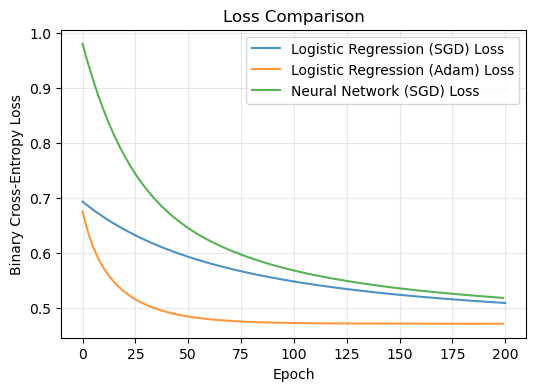

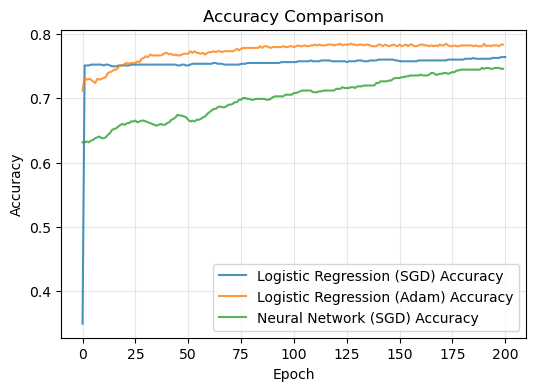

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# OPTIONAL EXTENSION: From Logistic Regression to a Simple Neural Newtork

url = "diabetes.csv"
df = pd.read_csv(url)

X = df.drop("Outcome", axis=1).values 
Y = df["Outcome"].values.reshape(-1,1) 

print(df.head())

X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

X = np.hstack([np.ones((X.shape[0], 1)), X])
N, d = X.shape

def sigmoid(z):
    return np.where(z >= 0, 1/(1+np.exp(-z)), np.exp(z)/(1+np.exp(z)))

def accuracy(theta, X, y):
    preds = sigmoid(X @ theta) >= 0.5
    return (preds == y).mean()

def relu(z):
    return np.maximum(0, z)

def relu_grad(z):
    g = np.zeros_like(z)
    g[z > 0] = 1.0
    return g

def l(theta, X, y):
    p = sigmoid(X @ theta)
    return -(y*np.log(p) + (1-y)*np.log(1-p)).mean()


def bce_loss(y_hat, y, eps=1e-10):
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -(y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)).mean()

#--SGD----------------------------------------
def SGD(l, grad_l, Theta0, X, y, batch_size=32, lr=1e-3, epochs=200):
    N = X.shape[0]
    theta = Theta0.copy()

    losses = [l(theta, X, y)]
    accs   = [accuracy(theta, X, y)]
    thetas = [theta.copy()]

    for epoch in range(epochs):
        indices = np.random.permutation(N)

        for start in range(0, N, batch_size):
            batch_idx = indices[start:start+batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]

            g = grad_l(theta, Xb, yb)
            theta = theta - lr * g

        losses.append(l(theta, X, y))      
        accs.append(accuracy(theta, X, y)) 
        thetas.append(theta.copy())

    return np.array(thetas), np.array(losses), np.array(accs)

Theta0 = np.zeros((d, 1))
theta_sgd, loss_sgd, acc_sgd = SGD(l, grad_l, Theta0, X, Y, batch_size=32, lr=1e-3, epochs=200)
print(f"SGD accuracy: {acc_sgd[-1]*100:.2f}%")

#--ADAM----------------------------------------
def train_adam(l, grad_l, X, y, lr=1e-3, epochs=200, batch_size=32, beta1=0.9, beta2=0.999, eps=1e-8):
    N, d = X.shape
    theta = np.zeros((d, 1))
    m = np.zeros_like(theta)
    v = np.zeros_like(theta)
    t = 0

    losses, accs = [], []

    for epoch in range(epochs):
        indices = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = indices[start:start+batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]
            g = grad_l(theta, Xb, yb)

            t += 1
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * (g * g)
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)

            theta -= lr * (m_hat / (np.sqrt(v_hat) + eps))

        losses.append(l(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, np.array(losses), np.array(accs)

theta_adam, loss_adam, acc_adam = train_adam(l, grad_l, X, Y, lr=1e-3, epochs=200, batch_size=32)
print(f"Adam accuracy: {acc_adam[-1]*100:.2f}%")

#--NN_SGD----------------------------------------
def train_nn_sgd(X, y, hidden=16, lr=1e-2, epochs=200, batch_size=32):
    N, d = X.shape

    W1 = np.random.normal(0, np.sqrt(2/d), size=(d, hidden))
    b1 = np.zeros((1, hidden))
    W2 = np.random.normal(0, np.sqrt(2/hidden), size=(hidden, 1))
    b2 = np.zeros((1, 1))
    losses, accs = [], []

    for _ in range(epochs):
        indices = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = indices[start:start+batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]
            z1 = Xb @ W1 + b1
            a1 = relu(z1)
            z2 = a1 @ W2 + b2
            y_hat = sigmoid(z2)

            delta2 = (y_hat - yb) / len(yb)
            dW2 = a1.T @ delta2
            db2 = delta2.sum(axis=0, keepdims=True)

            delta1 = (delta2 @ W2.T) * relu_grad(z1)
            dW1 = Xb.T @ delta1
            db1 = delta1.sum(axis=0, keepdims=True)

            W1 -= lr * dW1
            b1 -= lr * db1
            W2 -= lr * dW2
            b2 -= lr * db2

        z1 = X @ W1 + b1
        a1 = relu(z1)
        z2 = a1 @ W2 + b2
        yhat_full = sigmoid(z2)

        losses.append(bce_loss(yhat_full, y))
        preds = (yhat_full >= 0.5).astype(int)
        accs.append((preds == y).mean())

    return (W1, b1, W2, b2), np.array(losses), np.array(accs)

theta_nn_sgd, loss_nn_sgd, acc_nn_sgd = train_nn_sgd(
    X, Y,
    hidden=16,       
    lr=1e-3,
    epochs=200,
    batch_size=32,
)
print(f"Neural Network final accuracy: {acc_nn_sgd[-1]*100:.2f}%")

plt.figure(figsize=(6,4))
plt.plot(loss_sgd, label="Logistic Regression (SGD) Loss", alpha=0.8)
plt.plot(loss_adam, label="Logistic Regression (Adam) Loss", alpha=0.8)
plt.plot(loss_nn_sgd, label="Neural Network (SGD) Loss", alpha=0.8)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(acc_sgd, label="Logistic Regression (SGD) Accuracy", alpha=0.8)
plt.plot(acc_adam, label="Logistic Regression (Adam) Accuracy", alpha=0.8)
plt.plot(acc_nn_sgd, label="Neural Network (SGD) Accuracy", alpha=0.8)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()